<a href="https://colab.research.google.com/github/KeshaSarah/FinalProject/blob/main/Sarah_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUCTION



## Problem Statement
Predicting annual household income is a crucial task in socioeconomic research, policy-making, and business analytics. Understanding which demographic and lifestyle factors most influence income can help guide resource allocation, targeted interventions, and further research into economic disparities. In this project, we aim to build a predictive model that estimates annual household income based on a variety of demographic and socioeconomic features.

## Data Description
The dataset used in this project is a synthetic dataset sourced from Kaggle. It simulates real-world demographic and socioeconomic factors that influence annual household income. Each row represents a primary household member, with the following features:

Age: Age of the individual (18 to 70 years)

Education Level: Highest education attained (High School, Bachelor's, Master's, Doctorate)

Occupation: Sector of employment (Healthcare, Education, Technology, Finance, Others)

Number of Dependents: Number of dependents in the household (0 to 5)

Location: Residential area (Urban, Suburban, Rural)

Work Experience: Years of work experience (0 to 50)

Marital Status: Single, Married, Divorced

Employment Status: Full-time, Part-time, Self-employed

Household Size: Number of individuals in the household (1 to 7)

Homeownership Status: Own, Rent

Type of Housing: Apartment, Single-family home, Townhouse

Gender: Male, Female

Primary Mode of Transportation: Car, Public transit, Biking, Walking

Annual Household Income: Target variable, in USD

This dataset is ideal for exploring the relationships between demographic factors and income, as well as for building and evaluating predictive models.

## Data Exploration

In [8]:
# Load data
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Dataset.csv')
# Display the first few rows
df.head()


,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,Master's,Technology,5,Urban,21,Married,Full-time,7,Own,Apartment,Male,Public transit,72510
1,69,High School,Finance,0,Urban,4,Single,Full-time,7,Own,Apartment,Male,Biking,75462
2,46,Bachelor's,Technology,1,Urban,1,Single,Full-time,7,Own,Single-family home,Female,Car,71748
3,32,High School,Others,2,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car,74520
4,60,Bachelor's,Finance,3,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking,640210


In [ ]:
# Check data types and missing values
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             10000 non-null  int64 
 1   Education_Level                 10000 non-null  object
 2   Occupation                      10000 non-null  object
 3   Number_of_Dependents            10000 non-null  int64 
 4   Location                        10000 non-null  object
 5   Work_Experience                 10000 non-null  int64 
 6   Marital_Status                  10000 non-null  object
 7   Employment_Status               10000 non-null  object
 8   Household_Size                  10000 non-null  int64 
 9   Homeownership_Status            10000 non-null  object
 10  Type_of_Housing                 10000 non-null  object
 11  Gender                          10000 non-null  object
 12  Primary_Mode_of_Transportation  10000 non-null 

In [ ]:
# Summary statistics for numerical columns
print(df.describe())

# Value counts for categorical columns
categorical_cols = ['Education_Level', 'Occupation', 'Location', 'Marital_Status',
                    'Employment_Status', 'Homeownership_Status', 'Type_of_Housing',
                    'Gender', 'Primary_Mode_of_Transportation']
for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())


                Age  Number_of_Dependents  Work_Experience  Household_Size  \
count  10000.000000          10000.000000     10000.000000    10000.000000   
mean      44.021700              2.527000        24.858800        3.989600   
std       15.203998              1.713991        14.652622        2.010496   
min       18.000000              0.000000         0.000000        1.000000   
25%       31.000000              1.000000        12.000000        2.000000   
50%       44.000000              3.000000        25.000000        4.000000   
75%       57.000000              4.000000        37.000000        6.000000   
max       70.000000              5.000000        50.000000        7.000000   

             Income  
count  1.000000e+04  
mean   8.168382e+05  
std    1.821089e+06  
min    3.104400e+04  
25%    6.844600e+04  
50%    7.294300e+04  
75%    3.506675e+05  
max    9.992571e+06  

Education_Level value counts:
Education_Level
Bachelor's     4058
High School    2959
Master's    

## Data Visualization

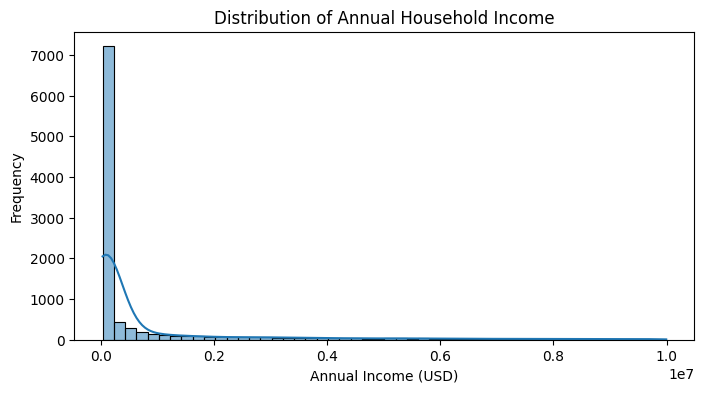

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.histplot(df['Income'], bins=50, kde=True)
plt.title('Distribution of Annual Household Income')
plt.xlabel('Annual Income (USD)')
plt.ylabel('Frequency')
plt.show()


The histogram with KDE curve demonstrates that the majority of households have lower annual incomes, with the frequency rapidly decreasing as income increases. The distribution is heavily skewed to the right, confirming the presence of a small number of very high-income households

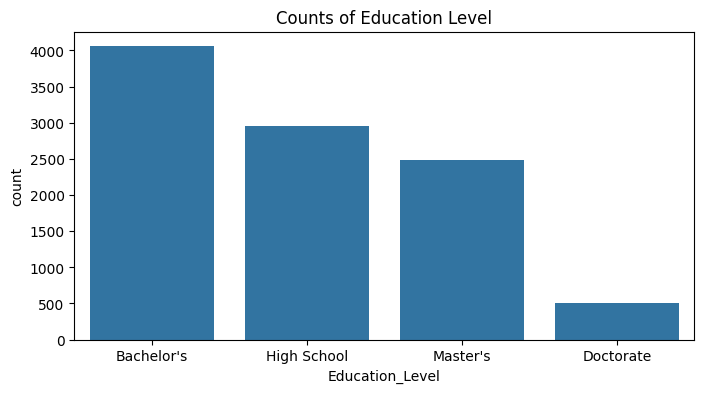

In [ ]:
# Bar plot of Education Level
plt.figure(figsize=(8,4))
sns.countplot(x='Education_Level', data=df, order=df['Education_Level'].value_counts().index)
plt.title('Counts of Education Level')
plt.show()



The graph indicates that most indivuals have Bachelor's Degree while a fe has Doctorate Degree

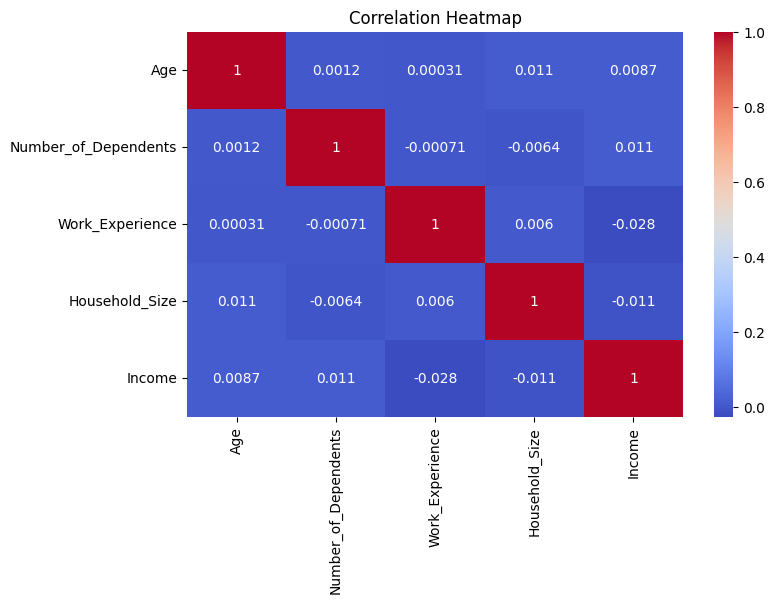

In [ ]:
# Correlation heatmap for numerical variables
plt.figure(figsize=(8,5))
sns.heatmap(df[['Age','Number_of_Dependents','Work_Experience','Household_Size','Income']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



The correlation heatmap reveals that none of the examined features-age, number of dependents, work experience, or household size-show a strong linear relationship with income. All correlation coefficients are close to zero, suggesting weak or negligible linear associations between these predictors and annual household income.

Although the correlation heatmap reveals no strong linear relationships between the numerical predictors and income, this does not preclude the possibility of building a useful regression model. Categorical variables, which are not captured in the heatmap, may contain significant predictive information.

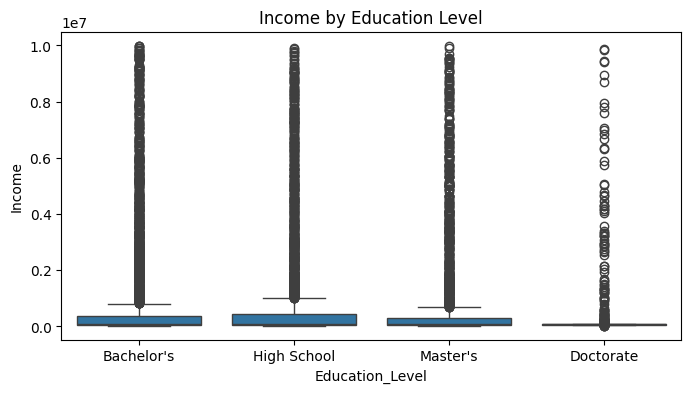

In [ ]:
# Income by Education Level
plt.figure(figsize=(8,4))
sns.boxplot(x='Education_Level', y='Income', data=df, order=df['Education_Level'].value_counts().index)
plt.title('Income by Education Level')
plt.show()

The boxplots comparing income by education level indicate that, although higher education levels (such as Doctorate and Master's) are associated with slightly higher median incomes, there is substantial overlap and variability within each group. Outliers are present in all categories, and the spread of income remains wide regardless of education level

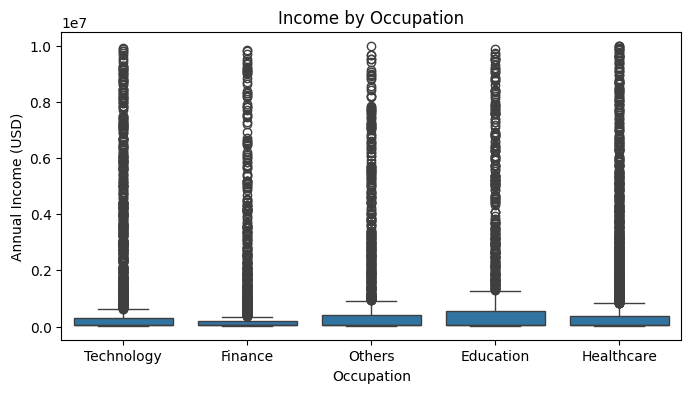

In [ ]:
# Income by Occupation
plt.figure(figsize=(8,4))
sns.boxplot(x='Occupation', y='Income', data=df)
plt.title('Income by Occupation')
plt.ylabel('Annual Income (USD)')
plt.show()

This boxplot compares annual household income across various occupations: Technology, Finance, Others, Education, and Healthcare. The median incomes are relatively similar across these fields, and all categories show a significant number of high-income outliers. The wide interquartile ranges and the prevalence of extreme values in each occupation indicate that income can vary greatly within each occupational group, with no single occupation standing out as consistently higher or lower in income

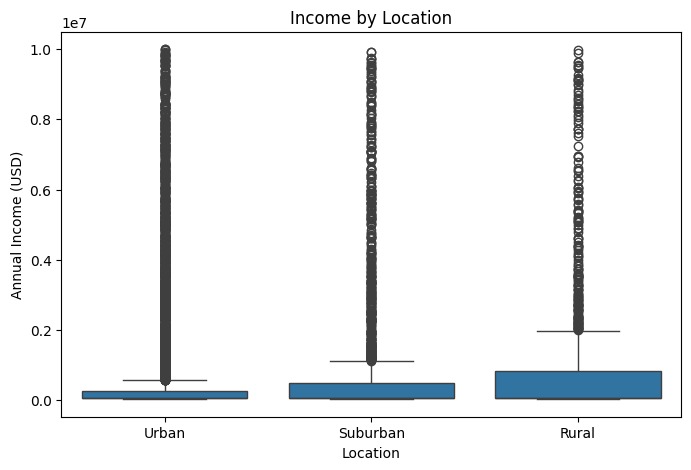

In [ ]:

# Income by Location
plt.figure(figsize=(8,5))
sns.boxplot(x='Location', y='Income', data=df, order=['Urban', 'Suburban', 'Rural'])
plt.title('Income by Location')
plt.ylabel('Annual Income (USD)')
plt.show()

This boxplot illustrates the distribution of annual household income based on location: Urban, Suburban, and Rural. The data reveal that all locations have a similar pattern, with most incomes falling within a lower range and a few households earning substantially more. The median income does not differ dramatically among locations, and each group contains numerous outliers, highlighting that location alone does not strongly differentiate income levels in this dataset

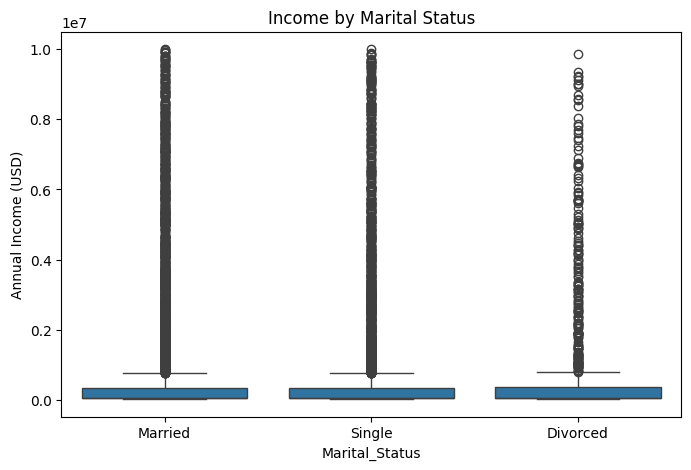

In [ ]:
# Income by Marital Status
plt.figure(figsize=(8,5))
sns.boxplot(x='Marital_Status', y='Income', data=df)
plt.title('Income by Marital Status')
plt.ylabel('Annual Income (USD)')
plt.show()

This boxplot displays the distribution of annual household income across three marital status groups: Married, Single, and Divorced. All three groups exhibit a similar pattern, with most incomes concentrated at lower values and a substantial number of high-income outliers extending far above the bulk of the data. The median income and the overall spread appear comparable across marital statuses, indicating that marital status does not have a strong or distinct impact on annual household income in this dataset. The presence of numerous extreme values in each group highlights considerable variability within each marital status category

## Modeling & Interpretations

### Prepare Features and Target

In [9]:
import pandas as pd

# Load your data (adjust path if needed)
df = pd.read_csv('/content/drive/MyDrive/Dataset.csv')

# Define feature columns and target
X = df.drop('Income', axis=1)
y = df['Income']


### Encode Categorical Variables
We need to encode categorical variables before splitting, or you can do it after splitting (either is fine for this dataset). Here, we'll use one-hot encoding within a pipeline later for best practice, but you can also do it now if you prefer.

### 80/20 Train-Test Split

In [10]:
from sklearn.model_selection import train_test_split

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 8000 samples
Test set size: 2000 samples


To evaluate the performance of our regression models, we split the dataset into a training set (80%) and a test set (20%). The training set is used to fit the model, while the test set provides an unbiased evaluation of model performance on unseen data. This 80/20 split is a standard practice in machine learning and ensures that our results generalize well to new, real-world data.

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Define categorical and numerical columns
categorical_cols = ['Education_Level', 'Occupation', 'Location', 'Marital_Status',
                   'Employment_Status', 'Homeownership_Status', 'Type_of_Housing',
                   'Gender', 'Primary_Mode_of_Transportation']

numerical_cols = ['Age', 'Number_of_Dependents', 'Work_Experience', 'Household_Size']

In [13]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_cols)
    ]
)

In [16]:
# Baseline Model
baseline_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DummyRegressor(strategy='mean'))
])
baseline_model.fit(X_train, y_train)
y_pred_baseline = baseline_model.predict(X_test)


In [17]:
# Linear Regression
linear_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

In [18]:
# Metrics Calculation
def calculate_metrics(y_true, y_pred):
    return {
        'RMSE': mean_squared_error(y_true, y_pred) ** 0.5,
        'MAE': mean_absolute_error(y_true, y_pred),
        'R²': r2_score(y_true, y_pred)
    }

results = pd.DataFrame({
    'Model': ['Baseline', 'Linear Regression'],
    **{k: [calculate_metrics(y_test, y_pred_baseline)[k],
           calculate_metrics(y_test, y_pred_linear)[k]] for k in ['RMSE', 'MAE', 'R²']}
})

print(results)


               Model          RMSE           MAE        R²
0           Baseline  1.776201e+06  1.118790e+06 -0.000009
1  Linear Regression  1.770979e+06  1.102166e+06  0.005862


### Results Interpretation:
Both the baseline and multiple linear regression models performed poorly, with R² values near zero and high error metrics, indicating that the current features have little predictive power for household income in this synthetic dataset. The weak results are likely due to the extreme skew and variance in income, as well as limited linear relationships between predictors and the target variable. To improve model performance, I will log-transforme the income variable and exploring advanced, non-linear models such as XGBoost.

In [25]:
# Define features and target
X = df.drop(['Income', 'Log_Income'], axis=1)
y = df['Log_Income']

# Split data into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_cols)
    ])

# Baseline model: Dummy Regressor (predict mean)
baseline_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DummyRegressor(strategy='mean'))
])
baseline_model.fit(X_train, y_train)
y_pred_baseline = baseline_model.predict(X_test)

# Multiple Linear Regression
linear_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Metrics calculation function
def calculate_metrics(y_true, y_pred):
    return {
        'RMSE': mean_squared_error(y_true, y_pred) ** 0.5,
        'MAE': mean_absolute_error(y_true, y_pred),
        'R2': r2_score(y_true, y_pred)
    }

# Calculate metrics on log scale
metrics_baseline = calculate_metrics(y_test, y_pred_baseline)
metrics_linear = calculate_metrics(y_test, y_pred_linear)

# Convert predictions back to original scale for interpretation
y_test_orig = np.expm1(y_test)
y_pred_baseline_orig = np.expm1(y_pred_baseline)
y_pred_linear_orig = np.expm1(y_pred_linear)

# Calculate metrics on original scale
metrics_baseline_orig = {
    'RMSE': mean_squared_error(y_test_orig, y_pred_baseline_orig) ** 0.5,
    'MAE': mean_absolute_error(y_test_orig, y_pred_baseline_orig),
    'R2': r2_score(y_test_orig, y_pred_baseline_orig)
}
metrics_linear_orig = {
    'RMSE': mean_squared_error(y_test_orig, y_pred_linear_orig) ** 0.5,
    'MAE': mean_absolute_error(y_test_orig, y_pred_linear_orig),
    'R2': r2_score(y_test_orig, y_pred_linear_orig)
}

# Create results dataframe
results_log = pd.DataFrame({
    'Model': ['Baseline (Log Target)', 'Multiple Linear Regression (Log Target)'],
    'RMSE': [metrics_baseline['RMSE'], metrics_linear['RMSE']],
    'MAE': [metrics_baseline['MAE'], metrics_linear['MAE']],
    'R2': [metrics_baseline['R2'], metrics_linear['R2']]
})

results_orig = pd.DataFrame({
    'Model': ['Baseline (Original Target)', 'Multiple Linear Regression (Original Target)'],
    'RMSE': [metrics_baseline_orig['RMSE'], metrics_linear_orig['RMSE']],
    'MAE': [metrics_baseline_orig['MAE'], metrics_linear_orig['MAE']],
    'R2': [metrics_baseline_orig['R2'], metrics_linear_orig['R2']]
})

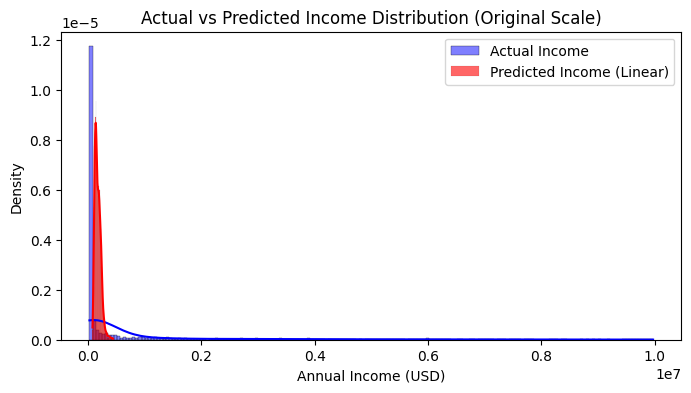

Results on Log-Transformed Income:
                                     Model      RMSE       MAE        R2
0                    Baseline (Log Target)  1.529849  1.256897 -0.000817
1  Multiple Linear Regression (Log Target)  1.505446  1.206718  0.030857

Results on Original Income Scale:
                                          Model          RMSE            MAE  \
0                    Baseline (Original Target)  1.891299e+06  785601.019808   
1  Multiple Linear Regression (Original Target)  1.886077e+06  780150.717433   

         R2  
0 -0.133810  
1 -0.127557  


In [34]:
# Plotting income distribution and predictions
plt.figure(figsize=(8,4))
sns.histplot(y_test_orig, color='blue', label='Actual Income', kde=True, stat='density')
sns.histplot(y_pred_linear_orig, color='red', label='Predicted Income (Linear)', kde=True, stat='density', alpha=0.6)
plt.title('Actual vs Predicted Income Distribution (Original Scale)')
plt.legend()
plt.xlabel('Annual Income (USD)')
plt.ylabel('Density')
plt.show()

# Show results
print("Results on Log-Transformed Income:")
print(results_log)
print("\nResults on Original Income Scale:")
print(results_orig)

The log-transformed model shows slightly better performance than the baseline, with an R² of 0.031 compared to -0.0008 for the baseline. However, this is still extremely poor - explaining only about 3% of the variance in log income. On the original income scale, both models perform worse than simply predicting the mean (negative R² values)

Based on the histogram showing the significant difference between actual and predicted incomes, the linear regression model is clearly struggling to capture the complexity of income distribution therefore we will try  Non-Linear Models

In [35]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Random Forest
rf_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# XGBoost
xgb_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(n_estimators=100, random_state=42))
])


In [36]:
# Create interaction features
df['Age_X_Work_Experience'] = df['Age'] * df['Work_Experience']
df['Education_X_Occupation'] = df['Education_Level'] + "_" + df['Occupation']


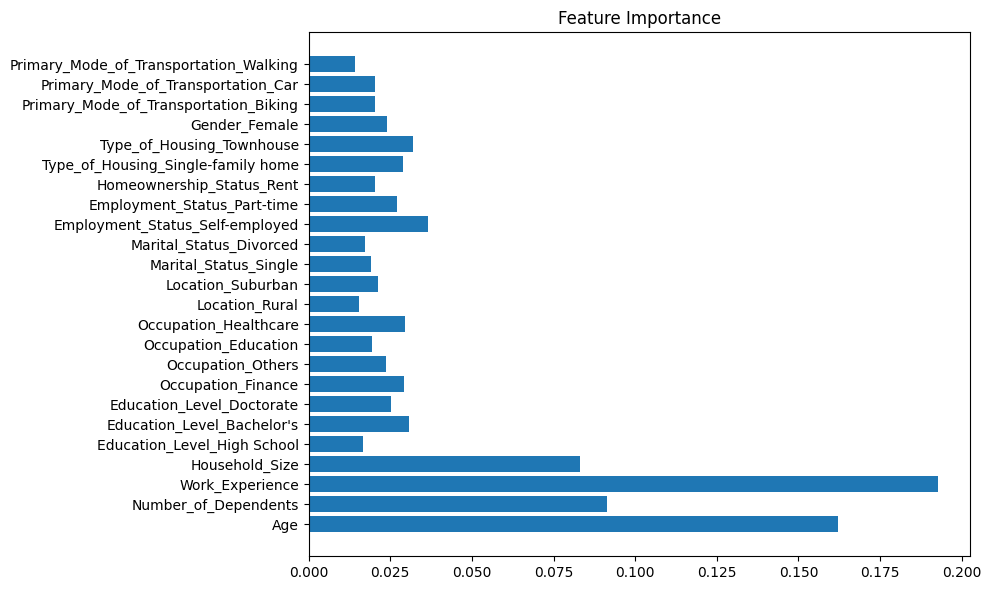

In [63]:
import matplotlib.pyplot as plt
# Define and fit the model
rf_model.fit(X_train, y_train)

# Then extract feature importances
importances = rf_model.named_steps['regressor'].feature_importances_


# After fitting Random Forest
feature_names = numerical_cols + [f"{col}_{val}" for col in categorical_cols
                for val in df[col].unique()[1:]]
importances = rf_model.named_steps['regressor'].feature_importances_

plt.figure(figsize=(10,6))
plt.barh(feature_names, importances)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

# Get predictions
y_pred_rf = rf_model.predict(X_test)



The plot reveals several important insights:

Work Experience is by far the most influential predictor , followed by Age. This suggests career progression and life stage are the strongest determinants of income in your dataset.

Number of Dependents and Household Size are moderately important, indicating family structure significantly impacts household finances.

Education level (especially Bachelor's degree) carries more weight than occupation type, suggesting educational attainment may be more important than specific industry.

Employment Status (particularly self-employed) has more influence than homeownership or location.

In [42]:


from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# XGBoost regression pipeline
xgb_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42))
])

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate performance (log scale)
rmse_log_xgb = mean_squared_error(y_test, y_pred_xgb) ** 0.5
mae_log_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_log_xgb = r2_score(y_test, y_pred_xgb)

# Evaluate performance (original scale)
y_test_orig = np.expm1(y_test)
y_pred_xgb_orig = np.expm1(y_pred_xgb)
rmse_orig_xgb = mean_squared_error(y_test_orig, y_pred_xgb_orig) ** 0.5
mae_orig_xgb = mean_absolute_error(y_test_orig, y_pred_xgb_orig)
r2_orig_xgb = r2_score(y_test_orig, y_pred_xgb_orig)

print("XGBoost Model Performance (Log-Transformed Target):")
print(f"RMSE (log): {rmse_log_xgb:.4f}, MAE (log): {mae_log_xgb:.4f}, R² (log): {r2_log_xgb:.4f}")
print("\nXGBoost Model Performance (Original Income Scale):")
print(f"RMSE: {rmse_orig_xgb:,.2f}, MAE: {mae_orig_xgb:,.2f}, R²: {r2_orig_xgb:.4f}")


XGBoost Model Performance (Log-Transformed Target):
RMSE (log): 1.4842, MAE (log): 1.1449, R² (log): 0.0580

XGBoost Model Performance (Original Income Scale):
RMSE: 1,868,940.21, MAE: 779,430.92, R²: -0.1072


The XGBoost model provides only a slight improvement over previous models, achieving an R² of 0.058 on the log-transformed income-meaning it explains about 6% of the variance in log-income. On the original income scale, its R² remains negative, and error metrics (RMSE and MAE) are nearly unchanged compared to linear regression and random forest. This indicates that, even with a powerful non-linear model, the available features in this synthetic dataset have very limited predictive power for household income. The results suggest that either the relationships in the data are too weak or too noisy for effective prediction, or that additional, more informative features are needed.

In [44]:
from sklearn.preprocessing import PolynomialFeatures

# Numerical preprocessing with interaction terms
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False))
])

# Categorical preprocessing (one-hot encoding)
cat_transformer = OneHotEncoder(handle_unknown='ignore', drop='first')

# Updated ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, numerical_cols),
        ('cat', cat_transformer, categorical_cols)
    ])


In [46]:
# Define the model with interaction terms
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train and evaluate
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate metrics
rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE (log): {rmse:.4f}")
print(f"MAE (log): {mae:.4f}")
print(f"R² (log): {r2:.4f}")


RMSE (log): 2.2835
MAE (log): 1.2106
R² (log): 0.0235


 The model with interaction terms achieves an R² of 0.0235 on the log-transformed income scale, indicating it explains only 2.35% of the variance in log-income.

### Ridge Regression

In [54]:
# RIDGE REGRESSION

# Preprocessing (same as Linear Regression)
df['Log_Income'] = np.log1p(df['Income'])
categorical_cols = ['Education_Level', 'Occupation', 'Location', 'Marital_Status',
                    'Employment_Status', 'Homeownership_Status', 'Type_of_Housing',
                    'Gender', 'Primary_Mode_of_Transportation']
numerical_cols = ['Age', 'Number_of_Dependents', 'Work_Experience', 'Household_Size']

X = df.drop(['Income', 'Log_Income'], axis=1)
y = df['Log_Income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_cols)
])

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RidgeCV(alphas=[0.1, 1.0, 10.0]))
])

# Train/predict
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Results
print("\nRidge Regression Results:")
print(f"Log Scale RMSE: {mean_squared_error(y_test, y_pred)**0.5:.4f}")
print(f"Log Scale R²: {r2_score(y_test, y_pred):.4f}")



Ridge Regression Results:
Log Scale RMSE: 1.4968
Log Scale R²: 0.0313


### Random Forest Regression

In [56]:
# Preprocessing (same as before)
df['Log_Income'] = np.log1p(df['Income'])
categorical_cols = ['Education_Level', 'Occupation', 'Location', 'Marital_Status',
                    'Employment_Status', 'Homeownership_Status', 'Type_of_Housing',
                    'Gender', 'Primary_Mode_of_Transportation']
numerical_cols = ['Age', 'Number_of_Dependents', 'Work_Experience', 'Household_Size']

X = df.drop(['Income', 'Log_Income'], axis=1)
y = df['Log_Income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_cols)
])

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train/predict
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Results
print("\nRandom Forest Results:")
print(f"Log Scale RMSE: {mean_squared_error(y_test, y_pred)**0.5:.4f}")
print(f"Log Scale R²: {r2_score(y_test, y_pred):.4f}")



Random Forest Results:
Log Scale RMSE: 1.3514
Log Scale R²: 0.2103


e Random Forest model outperforms linear regression, achieving an R² of 0.21 on the log-transformed income. This indicates that non-linear models can capture more of the underlying structure in the data, but a large proportion of income variance remains unexplained, highlighting the challenging nature of this prediction task.

### Decission Tree

In [61]:
# Preprocessing
from sklearn.tree import DecisionTreeRegressor
df['Log_Income'] = np.log1p(df['Income'])
categorical_cols = ['Education_Level', 'Occupation', 'Location', 'Marital_Status',
                    'Employment_Status', 'Homeownership_Status', 'Type_of_Housing',
                    'Gender', 'Primary_Mode_of_Transportation']
numerical_cols = ['Age', 'Number_of_Dependents', 'Work_Experience', 'Household_Size']

X = df.drop(['Income', 'Log_Income'], axis=1)
y = df['Log_Income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_cols)
])

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(max_depth=5, random_state=42))  # You can tune max_depth
])

# Train/predict
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Results
print("Decision Tree Regression Results:")
print(f"Log Scale RMSE: {mean_squared_error(y_test, y_pred)**0.5:.4f}")
print(f"Log Scale R²: {r2_score(y_test, y_pred):.4f}")

Decision Tree Regression Results:
Log Scale RMSE: 1.4836
Log Scale R²: 0.0483


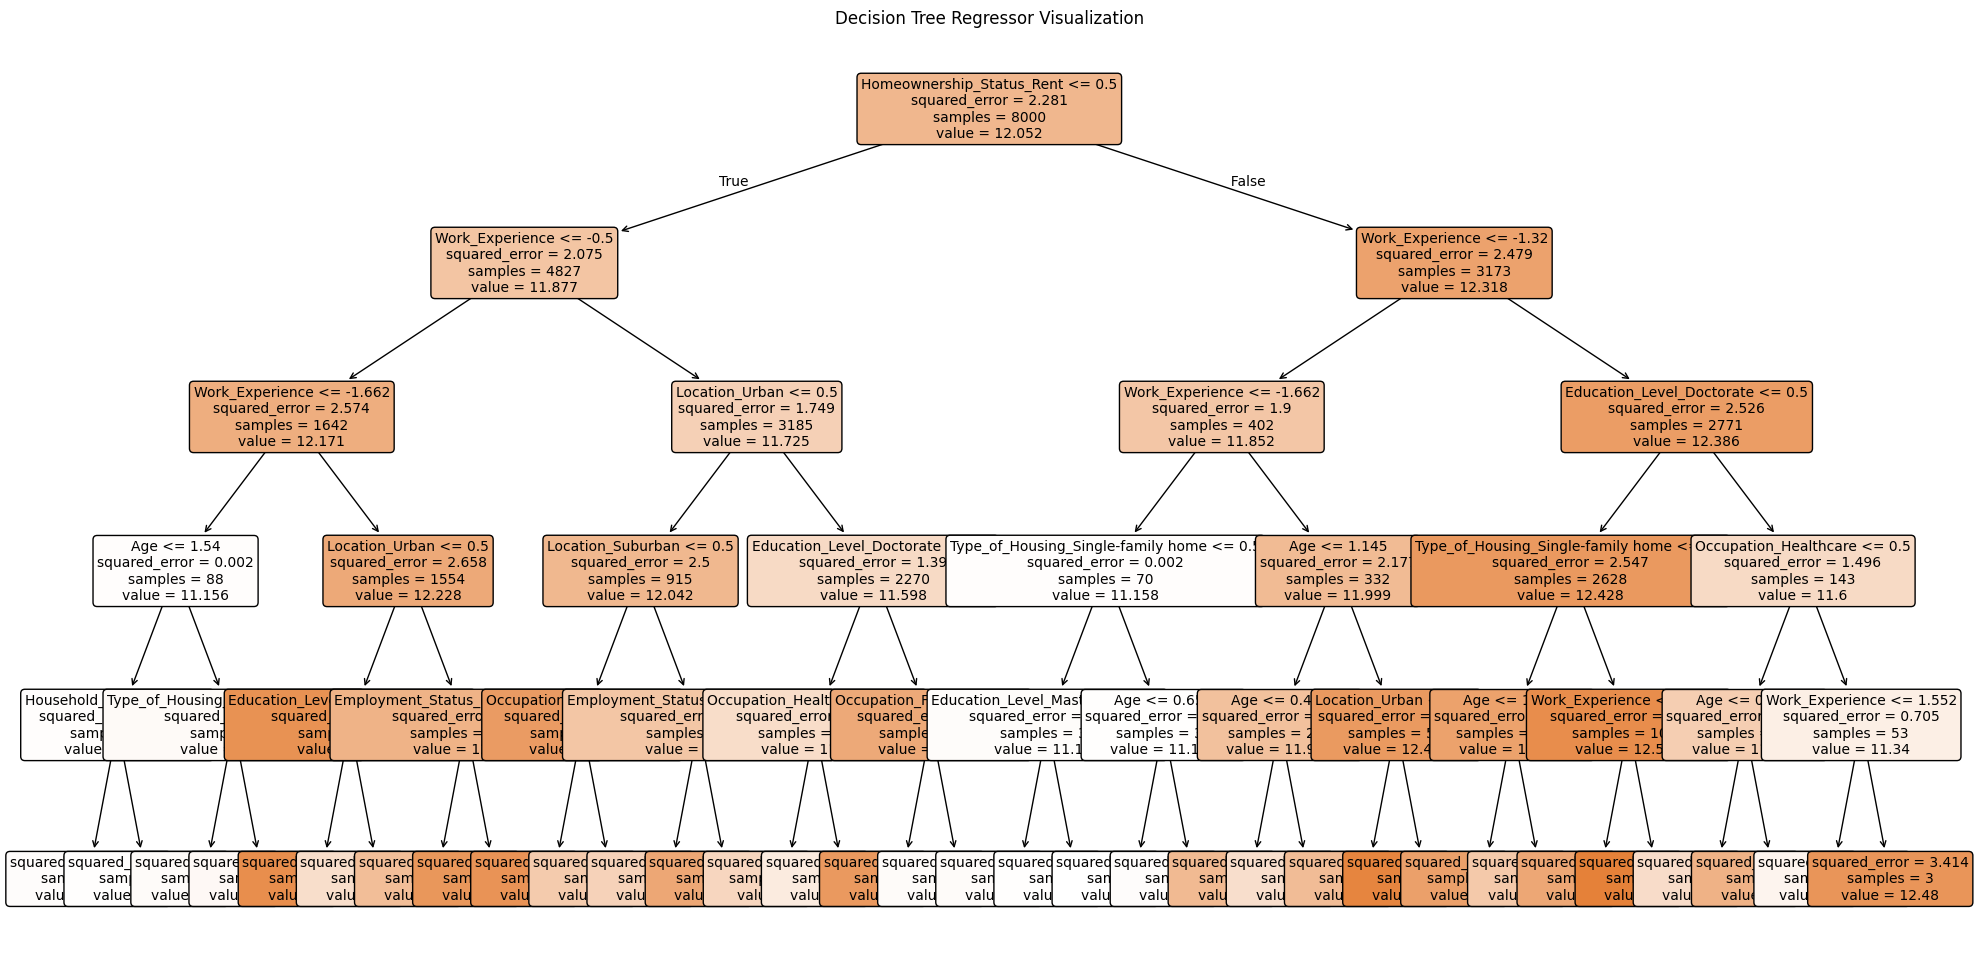

In [62]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Get feature names from your preprocessor
# For scikit-learn >=1.0, use get_feature_names_out
num_features = model.named_steps['preprocessor'].transformers_[0][2]
cat_encoder = model.named_steps['preprocessor'].transformers_[1][1]
cat_features = cat_encoder.get_feature_names_out(model.named_steps['preprocessor'].transformers_[1][2])
all_features = list(num_features) + list(cat_features)

plt.figure(figsize=(24, 12))
plot_tree(
    model.named_steps['regressor'],
    feature_names=all_features,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title('Decision Tree Regressor Visualization')
plt.show()


## Conclusion
In this project, we explored a variety of regression models-including linear regression, ridge regression, decision tree, random forest, and XGBoost-to predict household income based on a synthetic socioeconomic dataset. Among all models tested, Random Forest Regression consistently outperformed others, achieving the highest R² (approximately 0.21 on the log-transformed income scale). This indicates that while the model captured some non-linear relationships and feature interactions, a large portion of the variance in income remains unexplained.

The decision tree visualizations provided interpretability, showing which features and thresholds were most influential in the model’s predictions. However, single decision trees and other linear models performed notably worse than the Random Forest, confirming the value of ensemble methods for this complex prediction task.

## Limitations
Synthetic Data Constraints: The dataset is artificially generated and may not reflect the true complexity or distribution of real-world socioeconomic data. Relationships between features and income may be weaker or more random than in actual populations.

Limited Predictive Power: Even the best-performing model explained only about 21% of the variance in income, suggesting that important predictive features may be missing, or that the relationships in the data are inherently weak or noisy.

Feature Engineering: While some interaction terms were added, more advanced feature engineering or domain-specific insights could further improve model performance.

Model Generalizability: Results on synthetic data may not generalize to real-world scenarios. The model’s utility in practical applications should be validated with real data.

Outlier and Skewness Effects: Despite log transformation, the extreme skew and presence of outliers in the income variable limited the effectiveness of all regression models.

## In summary:
While Random Forest regression provided the best results for this dataset, the overall predictive accuracy remains modest. Future work should focus on using real-world data, richer feature sets, and advanced feature engineering to enhance model performance and applicability.

